In [1]:
# Import libraries and dependencies
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from MCForecastTools import MCSimulation

In [2]:
data = yf.download(  # or pdr.get_data_yahoo(...
        # tickers list or string as well
        tickers = ["XRP-USD", "BTC-USD"],

        # use "period" instead of start/end
        # valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
        # (optional, default is '1mo')
        period = "7y",

        # fetch data by interval (including intraday if period < 60 days)
        # valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
        # (optional, default is '1d')
        interval = "1d",

        # group by ticker (to access via data['SPY'])
        # (optional, default is 'column')
        group_by = 'ticker',

        # adjust all OHLC automatically
        # (optional, default is False)
        auto_adjust = True,

        # download pre/post regular market hours data
        # (optional, default is False)
        prepost = True,

        # use threads for mass downloading? (True/False/Integer)
        # (optional, default is True)
        threads = True,

        # proxy URL scheme use use when downloading?
        # (optional, default is None)
        proxy = None
    )

[*********************100%***********************]  2 of 2 completed


In [3]:
data.index = pd.to_datetime(data.index)
data.head()

BTC-USD                                                \
                  Open        High         Low       Close    Volume   
Date                                                                   
2014-09-17  465.864014  468.174011  452.421997  457.334015  21056800   
2014-09-18  456.859985  456.859985  413.104004  424.440002  34483200   
2014-09-19  424.102997  427.834991  384.532013  394.795990  37919700   
2014-09-20  394.673004  423.295990  389.882996  408.903992  36863600   
2014-09-21  408.084991  412.425995  393.181000  398.821014  26580100   

             XRP-USD                                         
                Open      High       Low     Close   Volume  
Date                                                         
2014-09-17  0.005123  0.005803  0.005123  0.005399  1281960  
2014-09-18  0.005398  0.005521  0.005091  0.005135   491147  
2014-09-19  0.005134  0.005167  0.004873  0.004942   407109  
2014-09-20  0.004942  0.004954  0.004736  0.004772   322621  
2014-09-21  0.004768  0.004791  0.004540  0.004570   309571

In [4]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
data=data.dropna()
MC_even_dist = MCSimulation(
    portfolio_data = data,
    weights = [0,1],
    num_simulation = 1000,
    num_trading_days = 252*10
)
MC_even_dist.portfolio_data.head()

BTC-USD                                                \
                  Open        High         Low       Close    Volume   
Date                                                                   
2014-09-17  465.864014  468.174011  452.421997  457.334015  21056800   
2014-09-18  456.859985  456.859985  413.104004  424.440002  34483200   
2014-09-19  424.102997  427.834991  384.532013  394.795990  37919700   
2014-09-20  394.673004  423.295990  389.882996  408.903992  36863600   
2014-09-21  408.084991  412.425995  393.181000  398.821014  26580100   

                          XRP-USD                                         \
           daily_return      Open      High       Low     Close   Volume   
Date                                                                       
2014-09-17          NaN  0.005123  0.005803  0.005123  0.005399  1281960   
2014-09-18    -0.071926  0.005398  0.005521  0.005091  0.005135   491147   
2014-09-19    -0.069843  0.005134  0.005167  0.004873  0.004942   407109   
2014-09-20     0.035735  0.004942  0.004954  0.004736  0.004772   322621   
2014-09-21    -0.024659  0.004768  0.004791  0.004540  0.004570   309571   

                         
           daily_return  
Date                     
2014-09-17          NaN  
2014-09-18    -0.048898  
2014-09-19    -0.037585  
2014-09-20    -0.034399  
2014-09-21    -0.042330

In [5]:
MC_even_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.955814,0.979714,1.036093,8.819673e-01,0.911600,1.035764,0.898250,0.950310,1.110840,0.924892,...,1.078291,0.880645,0.984139,1.024246,1.041281,1.014966,0.983478,1.098298,1.028269,1.093709
2,0.904585,1.020948,0.955021,9.169819e-01,0.880886,0.987011,0.912926,1.048683,1.058412,0.908998,...,1.205013,0.895443,1.010233,1.055927,0.962271,0.979172,1.009779,1.096418,1.018451,1.074791
3,0.905095,0.974673,1.024972,9.308138e-01,0.975115,1.045594,0.961019,0.985642,1.008215,0.864825,...,1.299927,0.937235,0.994096,0.947925,1.002157,1.066911,1.015667,1.035524,1.076344,1.082985
4,0.888065,0.996742,0.945619,8.940412e-01,0.969163,0.952915,1.001105,1.033868,1.019764,0.881706,...,1.009272,0.778206,1.038600,1.006242,1.091970,1.044950,1.197932,0.993484,1.107465,1.132127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,0.847160,74.061186,0.567220,9.956094e+06,2.586541,26.230699,0.115205,53.343391,0.456415,73254.337852,...,236.246722,9.482075,37.952620,2267.002523,2.570309,7.600500,0.633717,156161.794818,668.166557,11.843136
2517,0.871618,68.888615,0.654560,9.444311e+06,2.720745,28.343130,0.129437,55.800710,0.449441,74668.029495,...,232.384007,9.186353,37.277320,2318.376423,2.592022,8.428464,0.687399,158714.372073,603.326520,10.097053
2518,0.934975,65.586662,0.653630,9.583875e+06,2.706622,26.538165,0.143374,56.582934,0.428638,73393.304367,...,248.414550,9.254197,39.112386,2217.162838,2.178374,9.403669,0.750376,166314.834532,610.018076,10.537191
2519,1.021121,68.750985,0.621534,9.661292e+06,2.627019,24.697075,0.150147,54.773652,0.480192,71571.042348,...,271.498956,9.607093,30.610774,2015.859108,1.942556,9.012339,0.757981,172812.392577,644.933583,11.252782


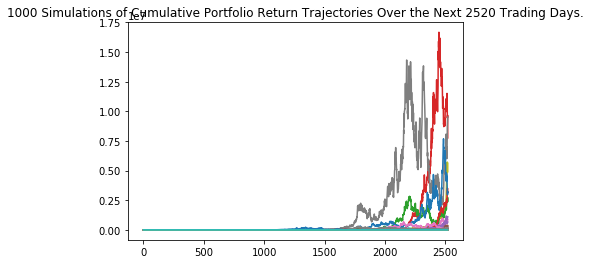

In [6]:
line_plot = MC_even_dist.plot_simulation()

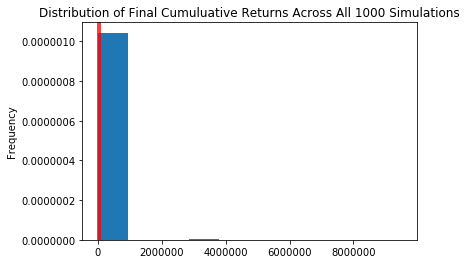

In [7]:
# Plot probability distribution and confidence intervals
att_dist_plot = MC_even_dist.plot_distribution()

In [8]:
# Fetch summary statistics from the Monte Carlo simulation results
att_tbl = MC_even_dist.summarize_cumulative_return()

# Print summary statistics
print(att_tbl)

count           1.000000e+03
mean            3.906640e+04
std             4.584871e+05
min             1.747944e-04
25%             2.676359e+00
50%             4.151492e+01
75%             5.757568e+02
max             9.518308e+06
95% CI Lower    2.585263e-02
95% CI Upper    7.371763e+04
Name: 2520, dtype: float64


In [9]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $15,000 investments
att_ci_lower = round(att_tbl[8]*15000,2)
att_ci_upper = round(att_tbl[9]*15000,2)

# Print results
print(f"There is a 95% chance that an initial investment of $15,000 in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${att_ci_lower} and ${att_ci_upper}.")

There is a 95% chance that an initial investment of $15,000 in the portfolio over the next 5 years will end within in the range of $387.79 and $1105764451.56.


In [10]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
data=data.dropna()
MC_even_dist = MCSimulation(
    portfolio_data = data,
    weights = [0,1],
    num_simulation = 1000,
    num_trading_days = 252*5
)
MC_even_dist.portfolio_data.head()

BTC-USD                                                \
                  Open        High         Low       Close    Volume   
Date                                                                   
2014-09-17  465.864014  468.174011  452.421997  457.334015  21056800   
2014-09-18  456.859985  456.859985  413.104004  424.440002  34483200   
2014-09-19  424.102997  427.834991  384.532013  394.795990  37919700   
2014-09-20  394.673004  423.295990  389.882996  408.903992  36863600   
2014-09-21  408.084991  412.425995  393.181000  398.821014  26580100   

                          XRP-USD                                         \
           daily_return      Open      High       Low     Close   Volume   
Date                                                                       
2014-09-17          NaN  0.005123  0.005803  0.005123  0.005399  1281960   
2014-09-18    -0.071926  0.005398  0.005521  0.005091  0.005135   491147   
2014-09-19    -0.069843  0.005134  0.005167  0.004873  0.004942   407109   
2014-09-20     0.035735  0.004942  0.004954  0.004736  0.004772   322621   
2014-09-21    -0.024659  0.004768  0.004791  0.004540  0.004570   309571   

                         
           daily_return  
Date                     
2014-09-17          NaN  
2014-09-18    -0.048898  
2014-09-19    -0.037585  
2014-09-20    -0.034399  
2014-09-21    -0.042330

In [11]:
MC_even_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.877943,1.051683,0.930786,1.055695,1.152987,1.145931,1.098294,1.027897,1.002439,0.965829,...,1.035550,0.925301,0.970135,0.948088,1.050578,0.972522,1.083696,0.959292,1.005996,1.027593
2,0.873926,1.172158,0.958778,1.058995,1.294442,1.031903,1.208569,0.948518,1.062092,1.047096,...,1.198482,0.921470,0.937290,1.007263,1.036960,1.092977,1.054144,1.046565,1.105724,0.982974
3,0.940336,1.319994,1.021987,1.147325,1.394605,1.050796,1.166284,0.941402,0.962617,1.074976,...,1.227958,0.779735,0.960621,1.086024,1.086953,1.033338,0.954903,0.925159,1.217249,1.016350
4,0.952731,1.240939,1.069938,1.160494,1.461722,1.147419,1.069815,0.952038,0.956465,1.034740,...,1.243464,0.738008,0.944198,1.202180,1.200100,0.964915,0.958376,0.758526,1.254274,1.048742
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,15.379868,0.060038,1720.201161,0.761519,7.261750,0.692135,80.638351,17.594256,77.823613,3.495805,...,0.997379,0.870491,16.965196,6.265338,0.270800,0.051237,0.776940,2.065257,107.163766,262.100774
1257,15.944576,0.058347,1664.954693,0.739518,7.324349,0.640186,70.440779,15.014675,82.540807,3.991675,...,1.079667,0.673453,15.784950,6.148858,0.258248,0.055128,0.727280,2.068595,103.253273,233.208689
1258,15.414628,0.058787,1323.865445,0.662310,7.565361,0.545600,73.550280,14.535928,86.669599,4.449220,...,1.181954,0.569050,15.242007,5.932745,0.253301,0.058369,0.750007,1.860587,105.133797,230.205774
1259,15.051017,0.070246,1197.394262,0.682791,8.040934,0.545228,71.498584,15.213056,92.081697,5.052108,...,1.197062,0.579737,15.850732,6.158720,0.254521,0.068470,0.745620,1.824668,97.022155,233.014204


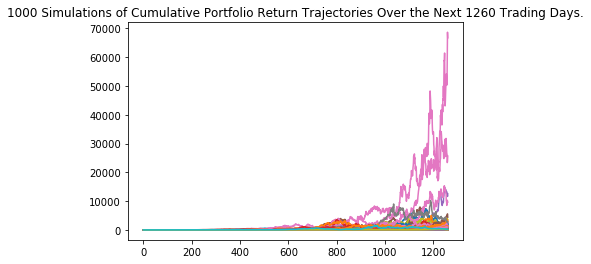

In [12]:
# Plot simulation outcomes
line_plot = MC_even_dist.plot_simulation()

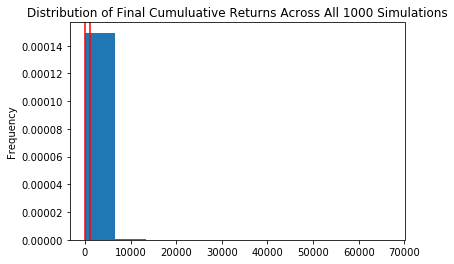

In [13]:
# Plot probability distribution and confidence intervals
att_dist_plot = MC_even_dist.plot_distribution()

In [14]:
# Fetch summary statistics from the Monte Carlo simulation results
att_tbl = MC_even_dist.summarize_cumulative_return()

# Print summary statistics
print(att_tbl)

count            1000.000000
mean              214.330231
std              2334.495453
min                 0.001186
25%                 0.809469
50%                 5.664917
75%                38.417646
max             66682.975693
95% CI Lower        0.022239
95% CI Upper     1186.336514
Name: 1260, dtype: float64


In [15]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $15,000 investments
att_ci_lower = round(att_tbl[8]*15000,2)
att_ci_upper = round(att_tbl[9]*15000,2)

# Print results
print(f"There is a 95% chance that an initial investment of $15,000 in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${att_ci_lower} and ${att_ci_upper}.")

There is a 95% chance that an initial investment of $15,000 in the portfolio over the next 5 years will end within in the range of $333.59 and $17795047.71.


In [16]:
# Running a Monte Carlo simulation to forecast 15 years cumulative returns
data=data.dropna()
MC_even_dist = MCSimulation(
    portfolio_data = data,
    weights = [0,1],
    num_simulation = 1000,
    num_trading_days = 252*15
)
MC_even_dist.portfolio_data.head()

BTC-USD                                                \
                  Open        High         Low       Close    Volume   
Date                                                                   
2014-09-17  465.864014  468.174011  452.421997  457.334015  21056800   
2014-09-18  456.859985  456.859985  413.104004  424.440002  34483200   
2014-09-19  424.102997  427.834991  384.532013  394.795990  37919700   
2014-09-20  394.673004  423.295990  389.882996  408.903992  36863600   
2014-09-21  408.084991  412.425995  393.181000  398.821014  26580100   

                          XRP-USD                                         \
           daily_return      Open      High       Low     Close   Volume   
Date                                                                       
2014-09-17          NaN  0.005123  0.005803  0.005123  0.005399  1281960   
2014-09-18    -0.071926  0.005398  0.005521  0.005091  0.005135   491147   
2014-09-19    -0.069843  0.005134  0.005167  0.004873  0.004942   407109   
2014-09-20     0.035735  0.004942  0.004954  0.004736  0.004772   322621   
2014-09-21    -0.024659  0.004768  0.004791  0.004540  0.004570   309571   

                         
           daily_return  
Date                     
2014-09-17          NaN  
2014-09-18    -0.048898  
2014-09-19    -0.037585  
2014-09-20    -0.034399  
2014-09-21    -0.042330

In [17]:
MC_even_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.007569,1.043556,1.134229,1.031099e+00,0.971397,0.963269,0.955710,0.973463,0.892935,1.020210,...,0.879065,1.003785,1.047859,1.011208,0.887633,1.084774,0.956342,0.870592,0.840184,1.028031
2,1.085583,1.109843,1.066453,9.493299e-01,0.946130,0.976324,1.083958,1.005145,0.949779,1.031174,...,0.959972,0.958062,1.014893,0.985232,0.827005,0.972512,1.020543,0.919875,0.751610,1.047590
3,0.876370,1.198695,1.054321,9.706281e-01,0.916831,0.885961,0.973583,1.089809,0.963745,1.066237,...,0.975704,0.894321,0.961417,0.940543,0.801151,0.964108,1.065405,0.981464,0.763036,1.008105
4,0.934043,1.242334,1.189527,9.270254e-01,1.051994,0.843284,0.977318,0.979912,1.005800,1.031388,...,1.015537,0.872850,1.006301,0.950055,0.860318,0.869459,1.110606,0.959259,0.802034,1.091026
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3776,5794.962239,99.883494,776.641389,3.049841e+06,1734.645600,430.860287,736.161175,3955.405827,0.523878,1001.357122,...,1089.119409,31293.588484,11.447954,2.900911,4.258859,60.724862,1.127840,2.071261,1561.474914,111.979501
3777,5810.473528,95.837495,842.068403,3.199131e+06,1613.744130,388.714675,675.231552,4176.770758,0.490666,971.852990,...,1000.009868,29599.796349,13.988223,2.893624,3.849133,58.754354,1.053905,1.901861,1538.088146,113.025919
3778,6457.226048,89.621440,838.647165,2.943664e+06,1527.381141,380.957388,660.939094,4201.141205,0.527504,1081.485618,...,966.465032,31659.658288,13.717492,2.722840,3.598924,51.326725,1.095645,1.950218,1635.899529,111.259272
3779,6365.686497,86.435296,801.868361,2.692045e+06,1637.920700,343.310622,595.762608,4878.331435,0.486381,991.944028,...,921.713542,30755.110643,12.597901,2.784712,3.542226,59.091927,1.143782,1.974981,1677.067040,136.094348


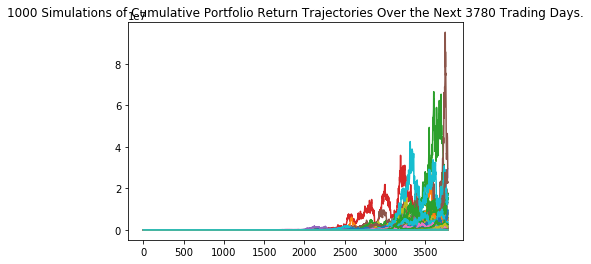

In [18]:
# Plot simulation outcomes
line_plot = MC_even_dist.plot_simulation()

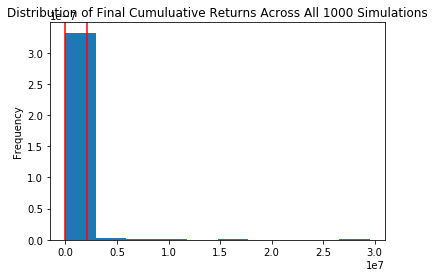

In [19]:
# Plot probability distribution and confidence intervals
att_dist_plot = MC_even_dist.plot_distribution()

In [20]:
# Fetch summary statistics from the Monte Carlo simulation results
att_tbl = MC_even_dist.summarize_cumulative_return()

# Print summary statistics
print(att_tbl)

count           1.000000e+03
mean            2.857392e+05
std             1.937596e+06
min             1.169567e-05
25%             1.159066e+01
50%             2.273853e+02
75%             4.707913e+03
max             2.951712e+07
95% CI Lower    4.786650e-02
95% CI Upper    2.097224e+06
Name: 3780, dtype: float64


In [21]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $15,000 investments
att_ci_lower = round(att_tbl[8]*15000,2)
att_ci_upper = round(att_tbl[9]*15000,2)

# Print results
print(f"There is a 95% chance that an initial investment of $15,000 in the portfolio"
      f" over the next 15 years will end within in the range of"
      f" ${att_ci_lower} and ${att_ci_upper}.")

There is a 95% chance that an initial investment of $15,000 in the portfolio over the next 15 years will end within in the range of $718.0 and $31458358326.33.
